In [4]:
import numpy as np
import matplotlib.pyplot as plt 

from toy_script import load_data
from scipy.interpolate import CubicSpline


In [5]:
#Data importation
X_train, y_train, X_test = load_data("./")

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


The line $i^{th}$ gives the $i^{th}$ time serie, where $i\in [0,3499]$.

The column $512\times(j-2)+k$ gives the $k^{th}$ time step of the $j^{th}$ captor, where $k\in [0,511]$ and $j\in [2,33]$.

Therefore, X_train\[ i , 512 * ( j - 2 ) + k \] gives the $k^{th}$ time step of the $i^{th}$ time serie of the $j^{th}$ captor.

In [6]:
#CD = captor dictionary
cd_number={
    "HBR":2,
    "HT":3,
    "HAX":4,
    "HAY":5,
    "HAZ":6,
    "HGX":7,
    "HGY":8,
    "HGZ":9,
    "HMX":10,
    "HMY":11,
    "HMZ":12,
    "CT":13,
    "CAX":14,
    "CAY":15,
    "CAZ":16,
    "CGX":17,
    "CGY":18,
    "CGZ":19,
    "CMX":20,
    "CMY":21,
    "CMZ":22,
    "FT":23,
    "FAX":24,
    "FAY":25,
    "FAZ":26,
    "FGX":27,
    "FGY":28,
    "FGZ":29,
    "FMX":30,
    "FMY":31,
    "FMZ":32
}
cd_name={
    2:"Heart beat rate",
    3:"Hand temperature",
    4:"Hand acceleration in the x direction",
    5:"Hand acceleration in the y direction",
    6:"Hand acceleration in the z direction",
    7:"Hand gyroscope in the x direction",
    8:"Hand gyroscope in the y direction",
    9:"Hand gyroscope in the z direction",
    10:"Hand magnetometer in the x direction",
    11:"Hand magnetometer in the y direction",
    12:"Hand magnetometer in the z direction",
    13:"Chest temperature",
    14:"Chest acceleration in the x direction",
    15:"Chest acceleration in the y direction",
    16:"Chest acceleration in the z direction",
    17:"Chest gyroscope in the x direction",
    18:"Chest gyroscope in the y direction",
    19:"Chest gyroscope in the z direction",
    20:"Chest magnetometer in the x direction",
    21:"Chest magnetometer in the y direction",
    22:"Chest magnetometer in the z direction",
    23:"Foot temperature",
    24:"Foot acceleration in the x direction",
    25:"Foot acceleration in the y direction",
    26:"Foot acceleration in the z direction",
    27:"Foot gyroscope in the x direction",
    28:"Foot gyroscope in the y direction",
    29:"Foot gyroscope in the z direction",
    30:"Foot magnetometer in the x direction",
    31:"Foot magnetometer in the y direction",
    32:"Foot magnetometer in the z direction"
}


In [7]:
def acces_captor_ts(X_train, captor_number:int,ts:int):
    """
    This function returns the data of a captor given its number
    """
    #captor data for a specific time serie
    data=[]
    data.extend([X_train[ts, 512 * (captor_number - 2) + k] for k in range(0, 512, 1)])
    return  data

def get_time_set():
    """
    This function returns the time set of a time serie
    """
    #times array
    dt=5/511 #5s for 511 points
    t=[]
    t.extend([k*dt] for k in range(0,512,1))
    return t


def display__ts_feature(captor:int,X_train,ts:int):
    """
    Function that plot the time series(ts) of a feature for a specific captor
    """
    t=get_time_set()
    captor_ts=acces_captor_ts(X_train,captor,ts)
    
    plt.figure(figsize=(12, 6))
    plt.plot(t, captor_ts)
    plt.title(cd_name[captor])
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    
    plt.tight_layout()
    plt.show()

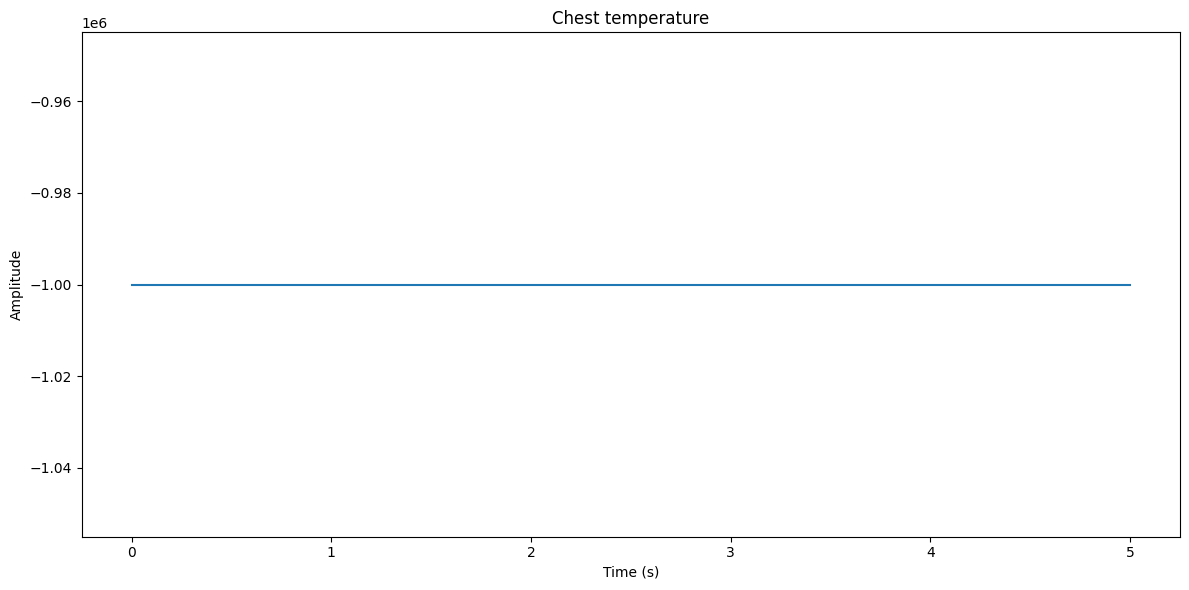

In [8]:
display__ts_feature(cd_number["CT"],X_train,600)

In [9]:
hand_acceleration = []
hand_acceleration.extend([X_train[600, 512 * (4 - 2) + k] for k in range(0, 512, 1)])
print(len(hand_acceleration))

hand_acceleration = hand_acceleration - np.mean(hand_acceleration)

fft_result = np.fft.fft(hand_acceleration)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only


plt.figure(figsize=(12, 6))

# plot of heart beat
plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

arg_max = np.argmax(positive_amplitude)
max_frequency = positive_freqs[arg_max]
print(max_frequency)

512


NameError: name 'time_step' is not defined

Function that calculates the major frequencies of a signal

In [10]:
def signal_frequencies(signal,duration,threshold,DC=False,time_step=5/511):
    """
        calculates the major frequencies of a signal:
        signal is a numpy table with the signal points
        duration is a numpy table containing the time steps related to the signal points
        threshold is the number of frequencies we want to have 
        DC = True if we don't remove the constant signal 
        DC = False (default value) if we remove the constant signal 
        time_step is the time between two points
    """

    if type(threshold) != int :
        raise ValueError("threshold is not an integer in function signal_frequencies")
    elif len(signal) != len(duration):
        raise ValueError("signal and duration have not the same size in function signal_frequencies")
    
    if DC == False:
        signal = signal - np.mean(signal) #remove the constant signal
    

    """Calculation of the FT"""
    fft_result = np.fft.fft(signal)  # Fourier transform
    frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
    amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
    positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
    positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

    """Calculation of the major frequencies"""
    major_frequencies = []
    for j in range(0,threshold,1):
        arg_max = np.argmax(positive_amplitude)
        max_frequency = positive_freqs[arg_max]
        major_frequencies.append(max_frequency)
        print(arg_max)
        # Suppresion of the found frequency from the signal
        index = 1
        while positive_amplitude[arg_max-index]-positive_amplitude[arg_max-(index+1)] > 1e-3 : #suppression of the pic before the max point
            positive_amplitude[arg_max-index] = -1
            index += 1

            if positive_amplitude[arg_max - (index+1)] <= 1e-6:
                break # we end the loop if the signal goes to zero (avoid issues at the beginning of the signal)

        index = 1
        while positive_amplitude[arg_max + index]-positive_amplitude[arg_max + (index+1)] > 1e-3:
            positive_amplitude[arg_max+index] = -1
            index += 1

            if positive_amplitude[arg_max + (index+1)] <= 1e-6:
                break # we end the loop if the signal goes to zero (avoid issues at the end of the signal)

        positive_amplitude[arg_max] = -1
        
        """plt.figure(figsize=(12, 6))

        # plot of heart beat
        plt.subplot(2, 1, 1)
        plt.plot(duration, hand_acceleration)
        plt.title("hand acceleration in one direction")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        # plot of fourier spectrum
        plt.subplot(2, 1, 2)
        plt.plot(positive_freqs, positive_amplitude, 'r')
        plt.title("Fourier spectrum")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.grid()
        plt.tight_layout()
        plt.show()"""

    return major_frequencies

5
10
19
29
24
[np.float64(0.998046875), np.float64(1.99609375), np.float64(3.792578125), np.float64(5.788671875), np.float64(4.790625)]


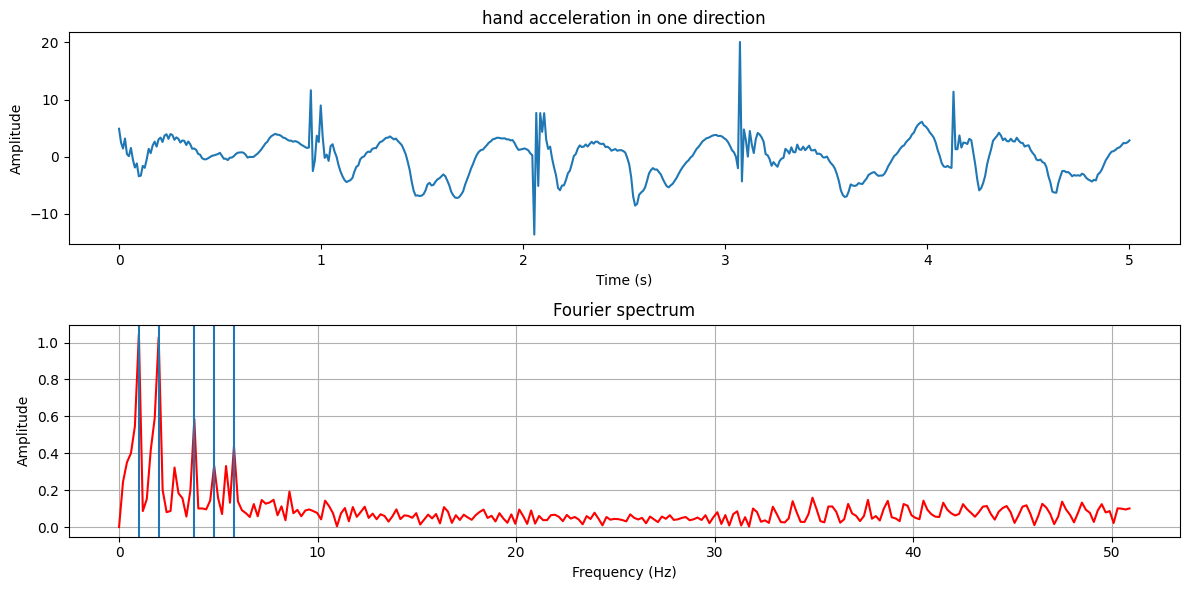

In [11]:
hand_acceleration = []
hand_acceleration.extend([X_train[450, 512 * (4 - 2) + k] for k in range(0, 512, 1)])

time_step = 5/511
duration = []
duration.extend([k*time_step] for k in range(0,512,1))

hand_acceleration = hand_acceleration - np.mean(hand_acceleration)

fft_result = np.fft.fft(hand_acceleration)  # Fourier transform
frequencies = np.fft.fftfreq(len(fft_result), time_step)  # Associated frequencies
amplitude = np.abs(fft_result) / len(fft_result) # Normalised amplitude spectrum 
positive_freqs = frequencies[:len(fft_result)//2]  # Positive frequencies only
positive_amplitude = amplitude[:len(fft_result)//2]  # Spectrum for positive frequencies only

major_frequencies = signal_frequencies(hand_acceleration,duration,5)
print(major_frequencies)

plt.figure(figsize=(12, 6))

# plot of heart beat
plt.subplot(2, 1, 1)
plt.plot(duration, hand_acceleration)
plt.title("hand acceleration in one direction")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# plot of fourier spectrum
plt.subplot(2, 1, 2)
plt.plot(positive_freqs, positive_amplitude, 'r')
plt.title("Fourier spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid()
for freq in major_frequencies:
   plt.axvline(freq)
plt.tight_layout()
plt.show()

following function calculate the proportion of missing value
let's say that if more than 10% of the data, we will dump the ts

In [12]:
def missing_values(captor:int,X_train,ts):
    """
    Function that returns the propotion of missing values for a captor
    """
    data=acces_captor_ts(X_train,captor,ts)
    count=data.count(-999999.99)
    prop = count / 512
    return prop


In [13]:
missing_values(cd_number["CT"],X_train,600)

1.0

In [64]:
def Interpolation_missing_measures(signal,duration):
    # remove missing points -> encoded as -999999.99
    indices_miss = []
    signal_prime = signal
    duration_prime = duration
    k=0
    for i in range(0,len(signal),1):
    
        if signal[i] <= -999990.0:
            signal_prime = np.delete(signal_prime, k)
            duration_prime = np.delete(duration_prime, k)
        else:
            k += 1
        

    # interpolation
    interpol = CubicSpline(duration_prime,signal_prime)

    # add the missing points 
    #for j in indices_miss:
    signal = interpol(duration)
    
    return signal


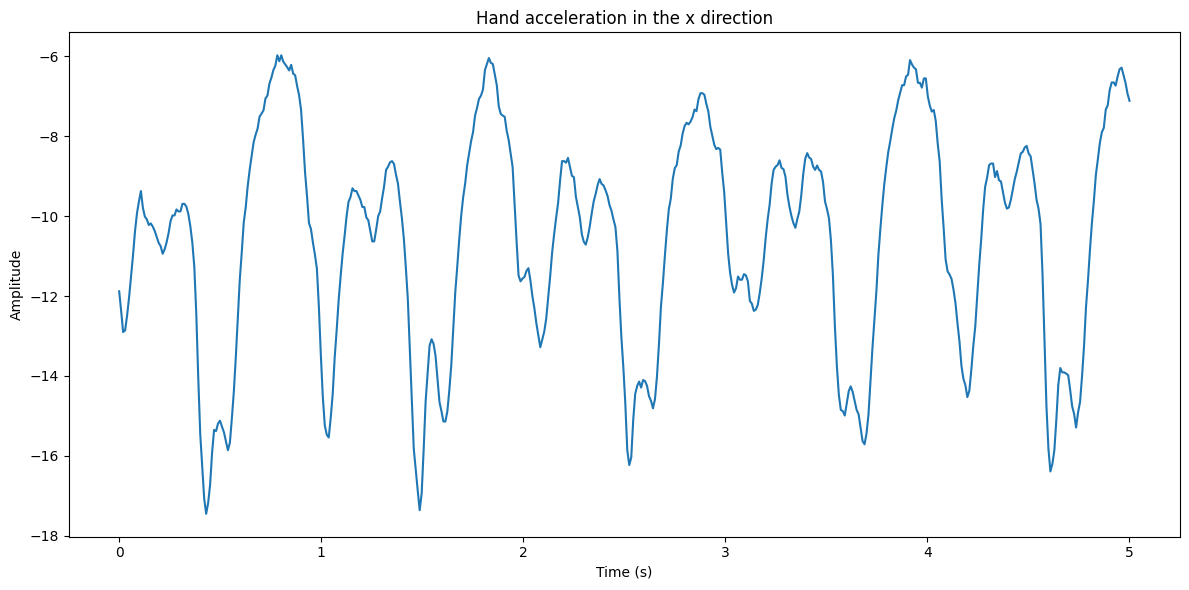

In [28]:
display__ts_feature(cd_number["HAX"],X_train,600)

-16.35
-16.87
-17.36
[-16.7743252]
[-17.34611261]
[-17.43484371]


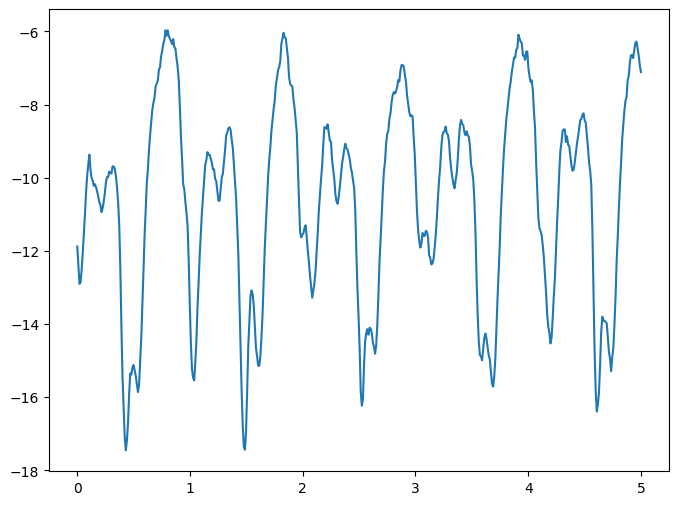

In [ ]:
hand_acceleration = []
hand_acceleration.extend([X_train[600, 512 * (4 - 2) + k] for k in range(0, 512, 1)])
print(hand_acceleration[150])
print(hand_acceleration[151])
print(hand_acceleration[152])
hand_acceleration[150]=-999999.99
hand_acceleration[151]=-999999.99
hand_acceleration[152]=-999999.99

signal = Interpolation_missing_measures(hand_acceleration,duration)

plt.figure(figsize=(8,6))
plt.plot(duration,signal)

print(signal[150])
print(signal[151])
print(signal[152])
